In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import csv
import seaborn as sns

In [2]:
DF2 = pd.read_csv('ErrorVSAngle.csv')
DF2 = DF2.drop(columns=['Unnamed: 0'])
DF2.loc[DF2['Geometry']==3 ,'Geometry']='Triangle'
DF2.loc[DF2['Geometry']==4 ,'Geometry']='Square'
DF2.loc[DF2['Geometry']==5 ,'Geometry']='Pentagon'
DF2.loc[DF2['Geometry']==6 ,'Geometry']='Hexagon'
print(DF2)
print(DF2.columns)

      Angle_deg    Err_deg    N  Geometry
0           0.0   8.093640  1.0  Triangle
1           2.0   7.932197  1.0  Triangle
2           4.0   9.463663  1.0  Triangle
3           6.0  10.366526  1.0  Triangle
4           8.0   9.748443  1.0  Triangle
...         ...        ...  ...       ...
2155      350.0   0.650893  5.0   Hexagon
2156      352.0   0.616919  5.0   Hexagon
2157      354.0   0.745012  5.0   Hexagon
2158      356.0   0.723119  5.0   Hexagon
2159      358.0   0.941955  5.0   Hexagon

[2160 rows x 4 columns]
Index(['Angle_deg', 'Err_deg', 'N', 'Geometry'], dtype='object')


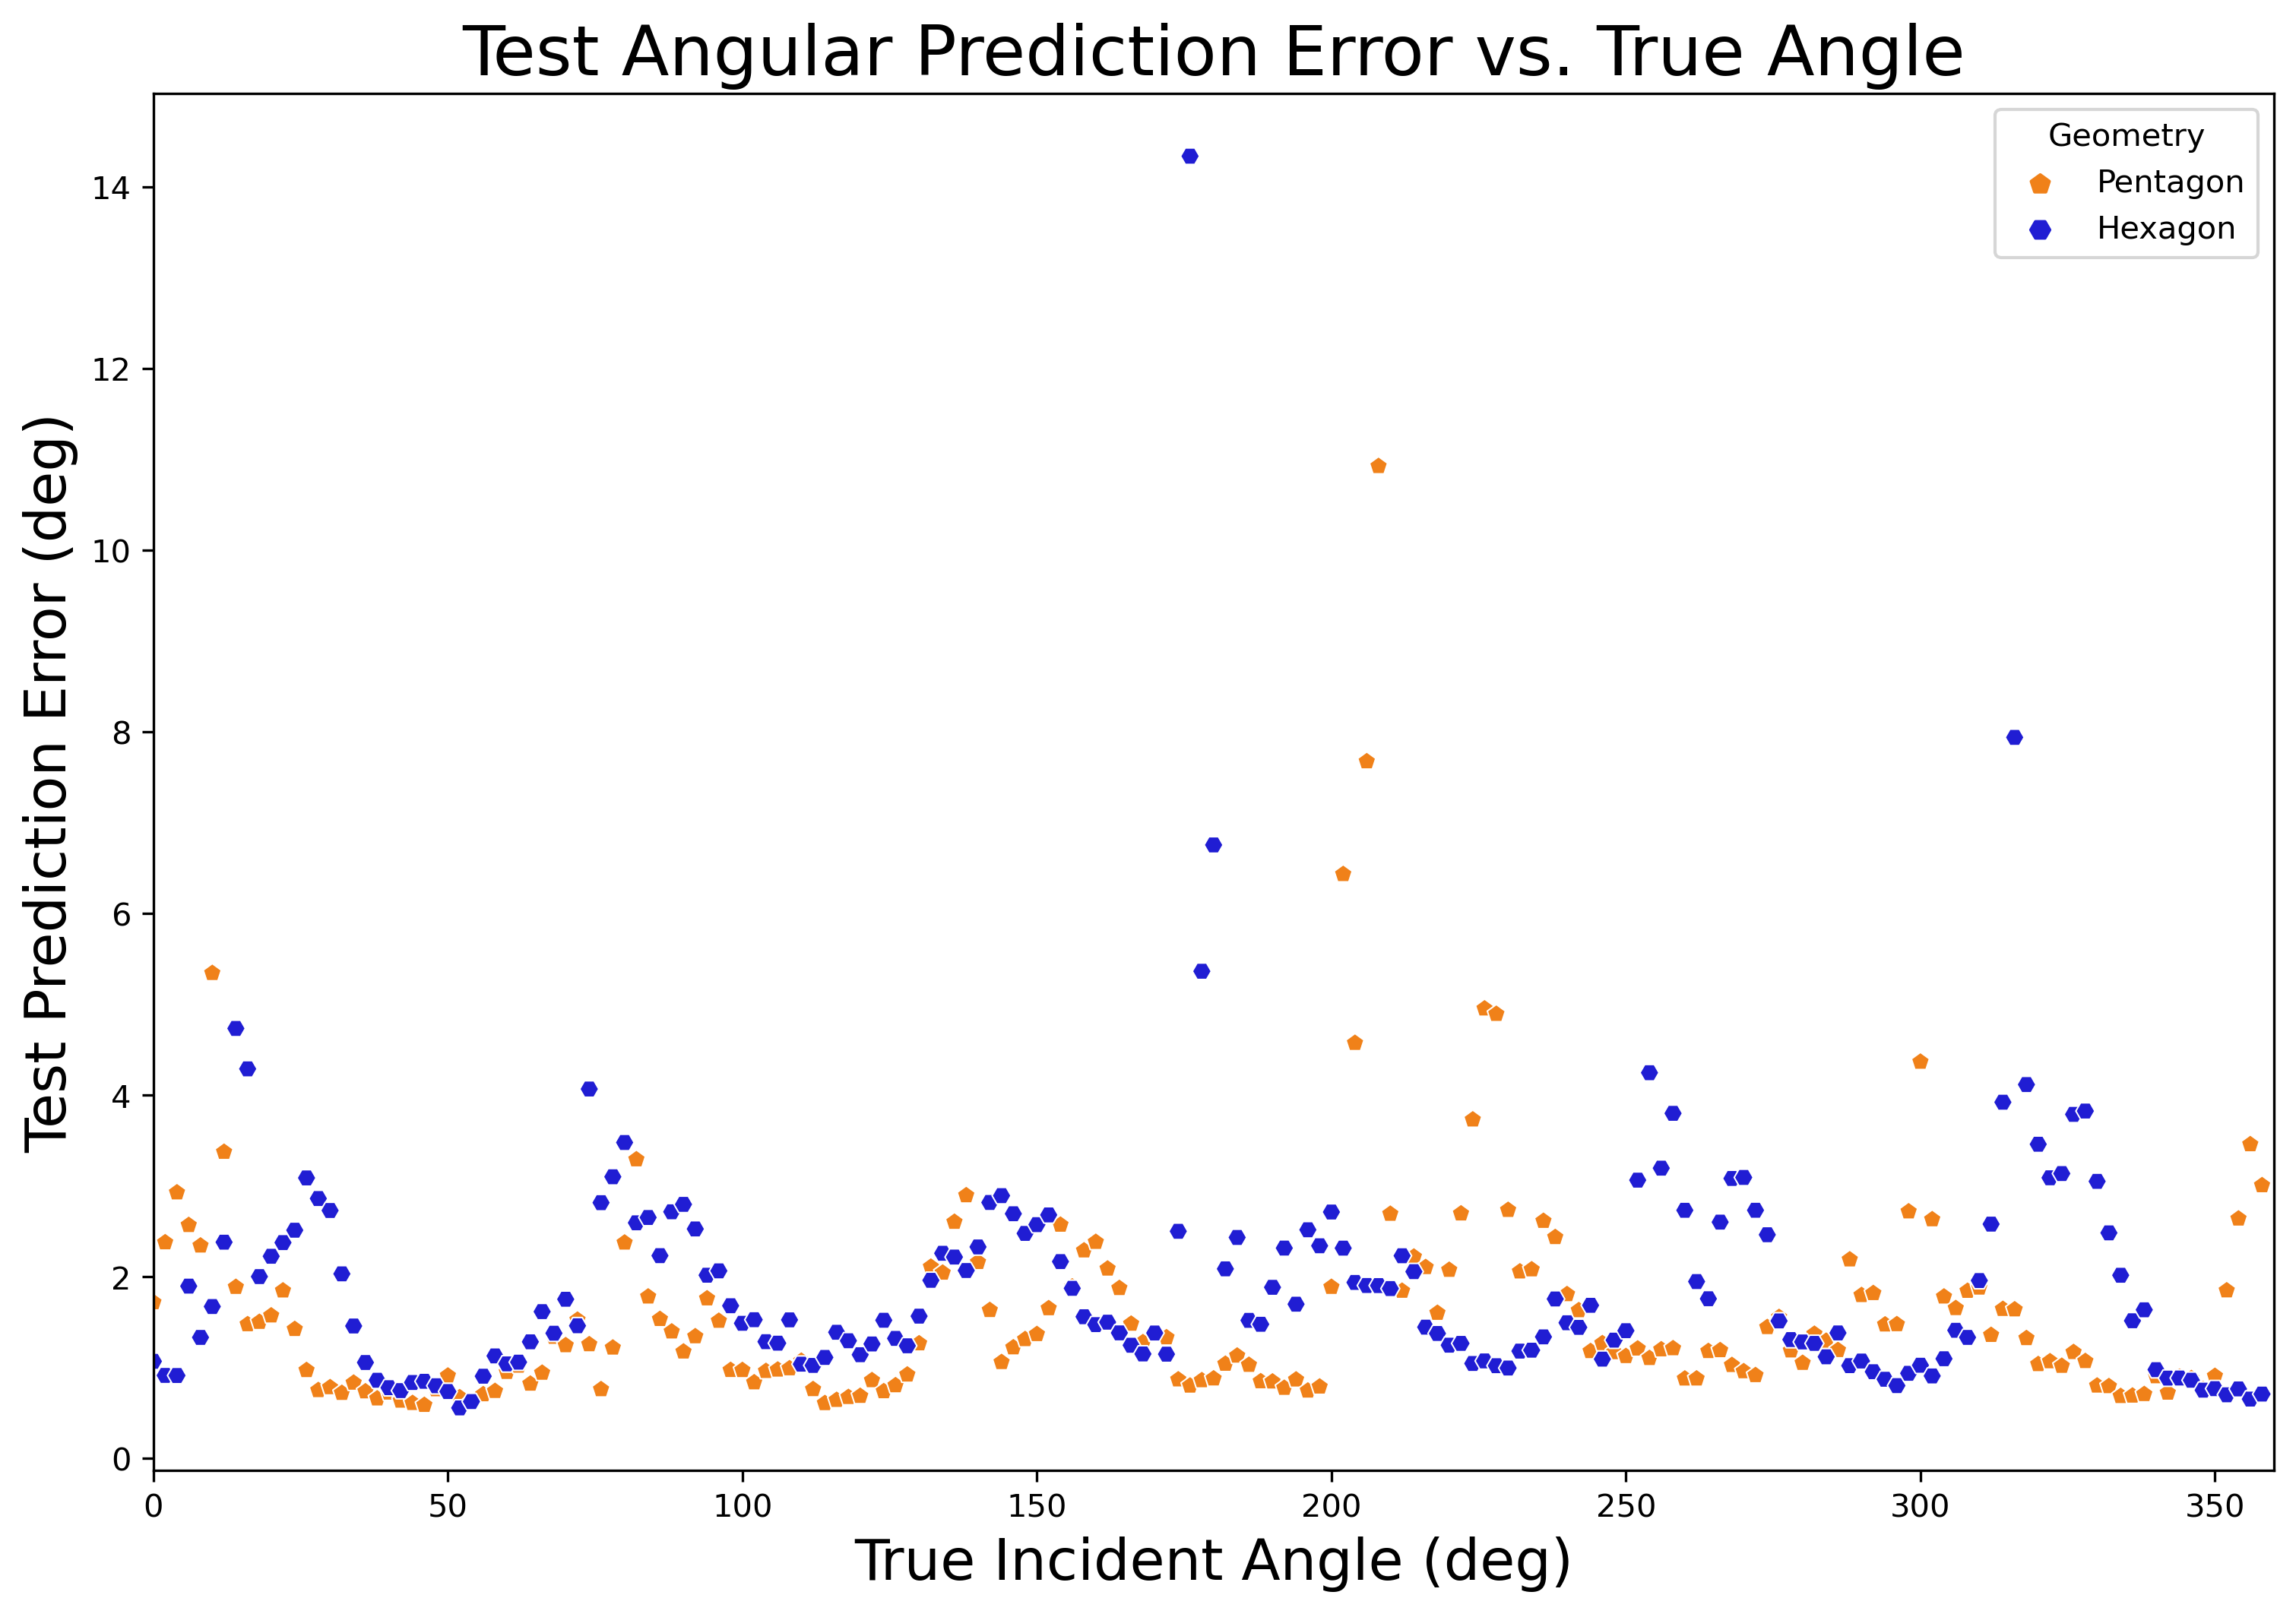

In [3]:
plt.figure(figsize=(12, 8), dpi=300)
titleFont=22
axisFont=18
legendFont=14
# ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], markers=['v', 'o', 'p', 'H'], data=DF[(DF.Geometry.isin(['Triangle', 'Square', 'Pentagon', 'Hexagon']) & DF.N==2.0)])
ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#f08119', '#201dd3'], markers=['p', 'H'], data=DF2[(DF2.Geometry.isin(['Pentagon', 'Hexagon'])) & (DF2.N == 1)])
plt.title('Test Angular Prediction Error vs. True Angle', fontsize=titleFont)
ax.set_xlabel('True Incident Angle (deg)', fontsize=axisFont)
plt.xlim([0, 360])
ax.set_ylabel('Test Prediction Error (deg)', fontsize=axisFont)
# ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('ErrorVSAngle.png')
plt.show()


In [4]:
DF0 = pd.read_csv('ErrorVSAngleLarge.csv')
DF0 = DF0.drop(columns=['Unnamed: 0'])
print(DF0)
DF = DF0
DF.loc[DF['Geometry']==3 ,'Geometry']='Triangle'
DF.loc[DF['Geometry']==4 ,'Geometry']='Square'
DF.loc[DF['Geometry']==5 ,'Geometry']='Pentagon'
DF.loc[DF['Geometry']==6 ,'Geometry']='Hexagon'
print(DF)
print(DF.columns)

         Angle_deg    Err_deg    N  Geometry
0            342.0   3.530552  1.0       3.0
1            110.0   8.750422  1.0       3.0
2            236.0  14.797823  1.0       3.0
3            148.0  40.552800  1.0       3.0
4            160.0   3.362611  1.0       3.0
...            ...        ...  ...       ...
3455983      250.0   0.293288  5.0       6.0
3455984       70.0   0.968111  5.0       6.0
3455985      334.0   1.222358  5.0       6.0
3455986       14.0   5.006392  5.0       6.0
3455987      266.0   4.778264  5.0       6.0

[3455988 rows x 4 columns]
         Angle_deg    Err_deg    N  Geometry
0            342.0   3.530552  1.0  Triangle
1            110.0   8.750422  1.0  Triangle
2            236.0  14.797823  1.0  Triangle
3            148.0  40.552800  1.0  Triangle
4            160.0   3.362611  1.0  Triangle
...            ...        ...  ...       ...
3455983      250.0   0.293288  5.0   Hexagon
3455984       70.0   0.968111  5.0   Hexagon
3455985      334.0   1.2223

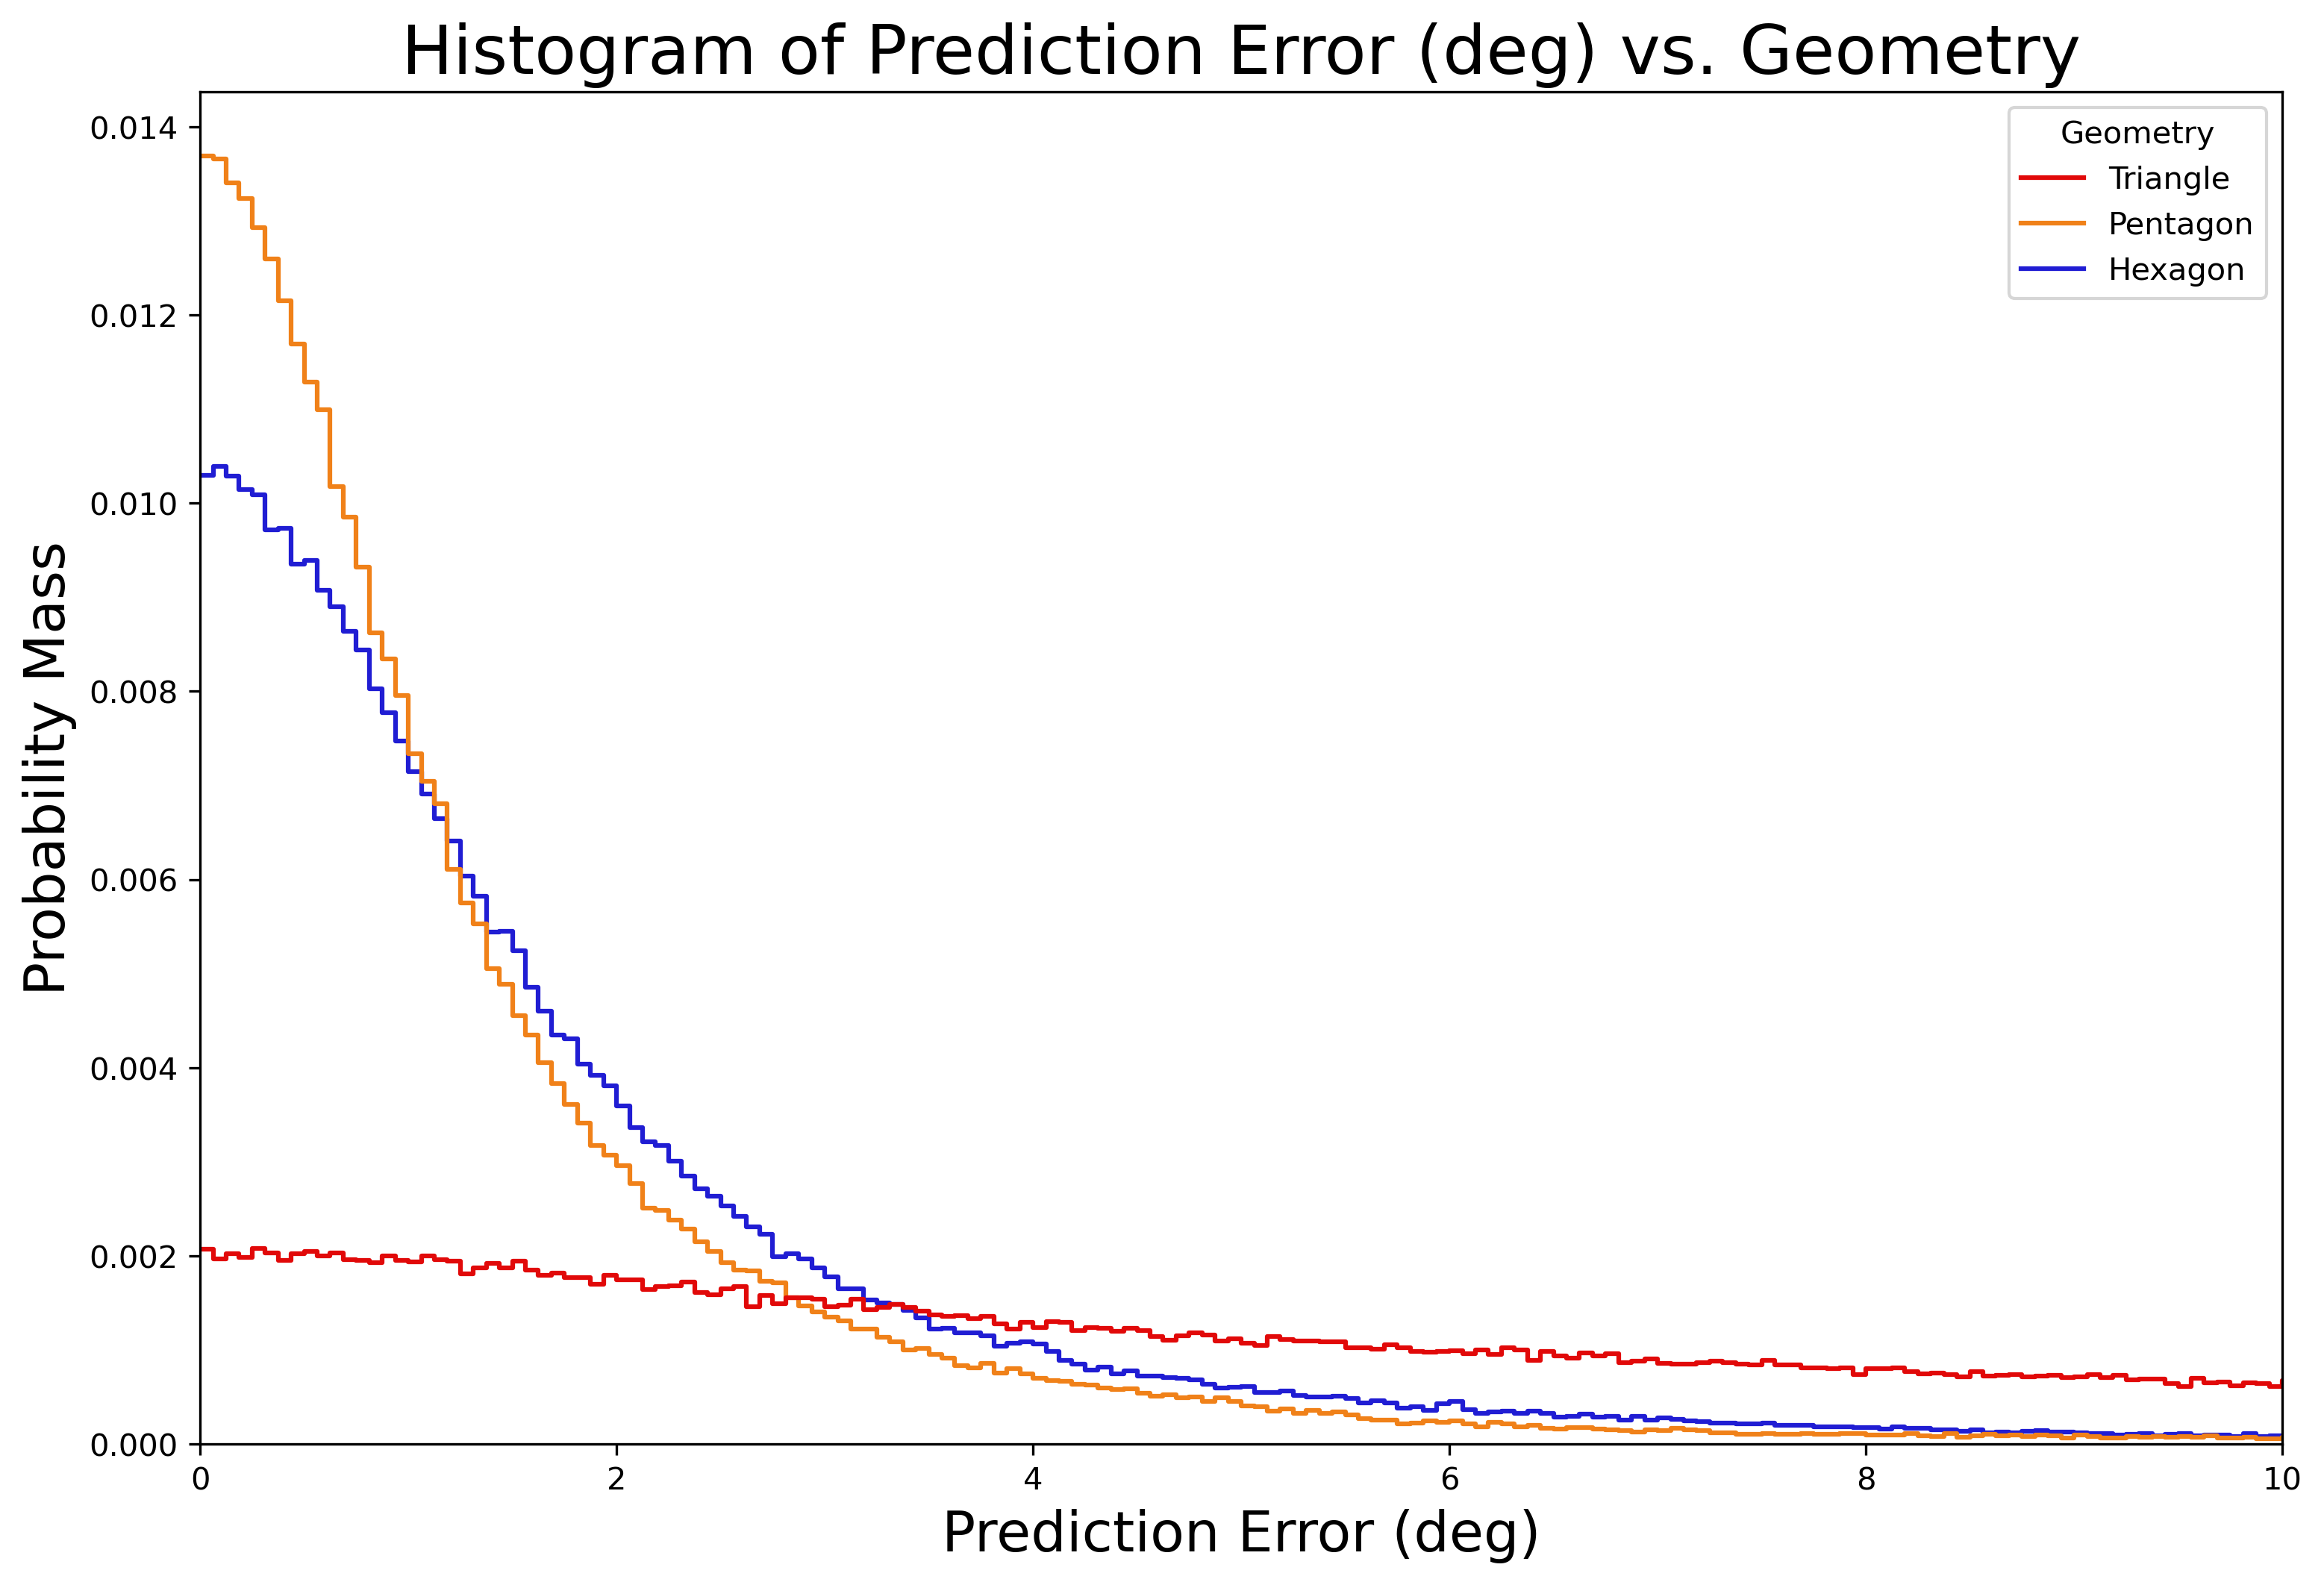

In [5]:
plt.figure(figsize=(12, 8), dpi=300)
titleFont=22
axisFont=18
legendFont=14
# ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], markers=['v', 'o', 'p', 'H'], data=DF[(DF.Geometry.isin(['Triangle', 'Square', 'Pentagon', 'Hexagon']) & DF.N==2.0)])

# As shaded, layered histogram: 
### # ax = sns.histplot(x="Err_deg", stat='probability', hue='Geometry', palette=['#e10909', '#f08119', '#201dd3'], data=DF[(DF.Geometry.isin(['Triangle', 'Pentagon', 'Hexagon'])) & (DF.N == 1)])

# As line plot via histogram (element and fill inputs adjusted from defaults)
ax = sns.histplot(x="Err_deg", stat='probability', hue='Geometry', palette=['#e10909', '#f08119', '#201dd3'], binwidth=0.0625, element='step', fill=False, data=DF[(DF.Geometry.isin(['Triangle', 'Pentagon', 'Hexagon'])) & (DF.N == 1)])

plt.title('Histogram of Prediction Error (deg) vs. Geometry', fontsize=titleFont)
ax.set_xlabel('Prediction Error (deg)', fontsize=axisFont)
plt.xlim([0, 10])
ax.set_ylabel('Probability Mass', fontsize=axisFont)
# ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('ErrorHist.png')
plt.show()

In [6]:
DF4 = DF.groupby(['Geometry', 'N']).mean()
DF3 = DF.groupby(['Geometry', 'N']).std()
print(DF4)
print()
print(DF3)
print(3455987/12)

               Angle_deg    Err_deg
Geometry N                         
Hexagon  1.0  179.000622   1.977069
         2.0  179.000622   2.101690
         5.0  179.000622   1.632408
Pentagon 1.0  179.000622   1.628620
         2.0  179.000622   1.787507
         5.0  179.000622   1.534590
Square   1.0  179.000622   5.304396
         2.0  179.000622   5.780100
         5.0  179.000622   4.821591
Triangle 1.0  179.000622  13.906878
         2.0  179.000622  13.095956
         5.0  179.000622  12.061673

              Angle_deg    Err_deg
Geometry N                        
Hexagon  1.0  103.92127   4.420113
         2.0  103.92127   4.816079
         5.0  103.92127   3.717200
Pentagon 1.0  103.92127   3.865414
         2.0  103.92127   4.799311
         5.0  103.92127   3.649883
Square   1.0  103.92127   7.887027
         2.0  103.92127   8.881788
         5.0  103.92127   7.741055
Triangle 1.0  103.92127  18.915210
         2.0  103.92127  17.069922
         5.0  103.92127  16.347245
28799

In [15]:
# print(DF0)
# print()
NN = [1, 2, 5]
GG = ['Triangle', 'Square', 'Pentagon', 'Hexagon']
LL = int(288000*0.95)

for ii in range(4):
    for jj in range(3):
        print('------------------------------------\n')
        print(GG[ii])
        print(NN[jj])
        print()
        DFtmp = DF[(DF.Geometry.isin([GG[ii]])) & (DF.N == NN[jj])]
        # DFtmp = DF0[(DF0.Geometry == GG[ii])]
        tmp = DFtmp["Err_deg"].to_numpy()
        print((np.sort(tmp))[LL])
        print()

------------------------------------

Triangle
1

51.36119206779833

------------------------------------

Triangle
2

47.786031999592716

------------------------------------

Triangle
5

44.07594837452264

------------------------------------

Square
1

18.189831948497797

------------------------------------

Square
2

20.069909819435512

------------------------------------

Square
5

16.4977755250322

------------------------------------

Pentagon
1

5.006856510699507

------------------------------------

Pentagon
2

5.15796761589687

------------------------------------

Pentagon
5

5.191818033423451

------------------------------------

Hexagon
1

6.076710021533624

------------------------------------

Hexagon
2

6.125395609937475

------------------------------------

Hexagon
5

5.04084353200949



In [ ]:
'''
# Process testErrs into a dataframe and condense to averages
# Order in bigData is [tri -- squ -- pent -- hex]

# Safety mechanism to not override data
if False:
    
    NN = np.array([1, 2, 5])
    lenDat = 287999
    nFilt = len(NN)
    nGeom = 4
    nSeed = 5
    dfMain = pd.DataFrame(columns=('Angle_deg', 'Err_deg', 'N', 'Geometry'))
    dfMain2 = pd.DataFrame(columns=('Angle_deg', 'Err_deg', 'N', 'Geometry'))
    for ii in range(nFilt):
        for jj in np.arange(3, 3+nGeom):
            geometryVal = jj
            tmpDAT = np.zeros((nSeed*lenDat, 5))
            bestSeed = 900.0*np.ones(nSeed)
            for kk in range(nSeed):
                if geometryVal == 3:
                    geomPath='tri/'
                    geoString = 'TRI'
                elif geometryVal == 4:
                    geomPath='squ/'
                    geoString = 'SQU'
                elif geometryVal == 5:
                    geomPath='pent/'
                    geoString = 'PENT'
                elif geometryVal == 6:
                    geomPath='hex/'
                    geoString = 'HEX'
                else:
                    raise ValueError('Geometry must be in {3, 4, 5, 6}')

                trainPath = '../compVal_N'+str(NN[ii])+'/' + geomPath + 'trainCost'+str(kk)+'.csv' 
                testPath = '../compVal_N'+str(NN[ii])+'/' + geomPath + 'testErrs'+str(kk)+'.csv'
                # testPathInit = 'compVal_N'+str(NN[ii])+'/' + geomPath + 'testCostInit'+str(kk)+'.csv'

                tmp0 = pd.read_csv(trainPath, header=None).to_numpy()
                bestSeed[kk] = tmp0[-1, 1]
                # print(tmp0[-1, 1])

                tmp = np.zeros((lenDat, 5))
                # tmp[0,:2] = pd.read_csv(testPathInit, header=None).to_numpy()
                tmp[:,:2] = pd.read_csv(testPath, header=None).to_numpy()
                tmp[:,:2] *= 180.0/math.pi
                tmp[:,0] = np.round_(tmp[:,0])
                # bestSeed[kk] = np.mean(tmp[:,1])
                tmp[:,2] = np.ones(lenDat)*NN[ii]
                tmp[:,3] = np.ones(lenDat)*geometryVal
                tmp[:,4] = np.ones(lenDat)*(kk+1)
                tmpDAT[kk*lenDat:(kk+1)*lenDat,:] = tmp


            # Choose the best seed for each geometry-filter configuration
            kkStar = np.argmin(bestSeed)
            # print(bestSeed)
            # print(f"The best seed is Seed {kkStar+1}, representing element"+ f" [{kkStar}] of bestSeed array")
            # breakpoint()

            dfTmp = pd.DataFrame(data=tmpDAT[kkStar*lenDat:(kkStar+1)*lenDat,:4],
                                 columns=('Angle_deg', 'Err_deg', 'N', 'Geometry')
                                )

            dfMain = pd.concat([dfMain, dfTmp])

            dfTmp2 = dfTmp.groupby(['Angle_deg'], as_index=False).mean()
            # print(dfTmp2.shape)
            # Append to main dataframe
            dfMain2 = pd.concat([dfMain2, dfTmp2])
            # print(dfMain.shape)


            # BIGDAT[(ii*nGeom*nSeed*lenTraj + (jj-3)*nSeed*lenTraj + kk*lenTraj):(ii*nGeom*nSeed*lenTraj + (jj-3)*nSeed*lenTraj + (kk+1)*lenTraj), :] = tmp

    # Save to csv file
    dfMain.to_csv('ErrorVSAngleLarge.csv')  
    dfMain2.to_csv('ErrorVSAngle.csv')  
'''